In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Readind the data-file 
interactions = pd.read_csv('customer_interactions.csv')
interactions.head()

,spend,interactions
0,5818,23
1,6255,15
2,6139,15
3,6070,19
4,4837,24


In [5]:
## Computing z-scores
interactions['z_spend'] = (interactions['spend'] - interactions['spend'].mean()) / interactions['spend'].std()
interactions['z_interactions'] = (interactions['interactions'] - interactions['interactions'].mean()) / interactions['interactions'].std()
interactions.head()

,spend,interactions,z_spend,z_interactions
0,5818,23,0.923351,0.647282
1,6255,15,1.145958,-0.809740
2,6139,15,1.086868,-0.809740
3,6070,19,1.051719,-0.081229
4,4837,24,0.423632,0.829410


In [6]:
## Performing PCA
PCA_md = PCA()
PCA_md.fit(interactions[['z_spend', 'z_interactions']])

## Computing/Extracting the components
Components = pd.DataFrame(PCA_md.fit_transform(interactions[['z_spend', 'z_interactions']]))
Components.head()

,0,1
0,1.110606,0.195210
1,0.237742,1.382887
2,0.195959,1.341104
3,0.686240,0.801115
4,0.886035,-0.286928


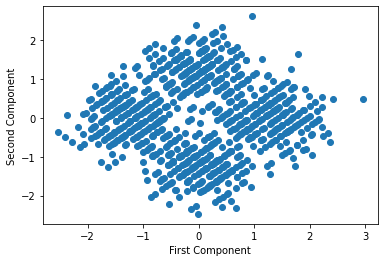

In [7]:
## Visualizing the two components
plt.plot(Components.iloc[:, 0], Components.iloc[:, 1], 'o')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show();

In [ ]:
## From the above plot, the first two components are suggesting that we should consider 4 cluster for k-means.